# Import

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('Telco-Customer-Churn.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Preprocess

## Understanding

In [89]:
display(df.info())

for col in df:
    print(f'{col} : {df[col].unique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['F' 'Male' 'Female' 'M' nan]
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [1.0e+00 3.4e+01 2.0e+00 4.5e+01 8.0e+00 2.2e+01 1.0e+01 2.8e+03 6.2e+01
 1.3e+01 1.6e+01 5.8e+01 4.9e+01 2.5e+01 6.9e+01 5.2e+01 7.1e+01 2.1e+01
 1.2e+01 3.0e+01 4.7e+01 7.2e+01 1.7e+01 2.7e+01 5.0e+00 4.6e+01 1.1e+01
 7.0e+01 6.3e+01 4.3e+01 1.5e+01 6.0e+01 1.8e+01 6.6e+01 9.0e+00 3.0e+00
 3.1e+01 5.0e+01 6.4e+01 5.6e+01 7.0e+00 4.2e+01 3.5e+01 4.8e+03 2.9e+01
 6.5e+01 3.8e+01 6.8e+01 3.2e+01 5.5e+01 3.7e+01 3.6e+01 4.1e+01 6.0e+00
 4.0e+00 3.3e+01 6.7e+01 2.3e+01 5.7e+01 6.1e+01 1.4e+01 2.0e+03 5.3e+01
 2.0e+01 4.0e+01 5.9e+01 2.4e+01 4.4e+01 1.9e+01 7.1e+03 5.4e+01 5.1e+01
 2.3e+03 4.8e+01 2.8e+01     nan 2.6e+01 0.0e+00 3.9e+01]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['N

In [90]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7040.000000,7043.000000
mean,0.162147,35.043892,64.761692
std,0.368612,115.282871,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,7100.000000,118.750000


## Visualize

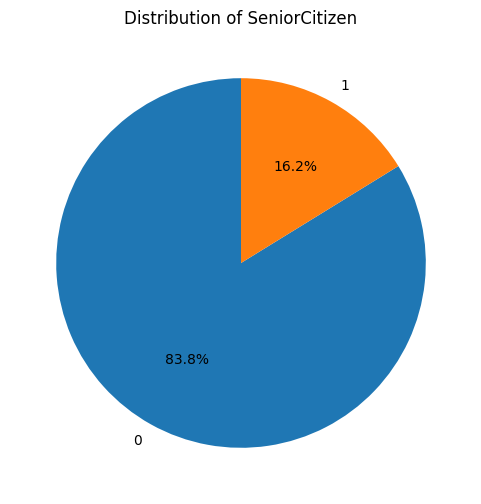

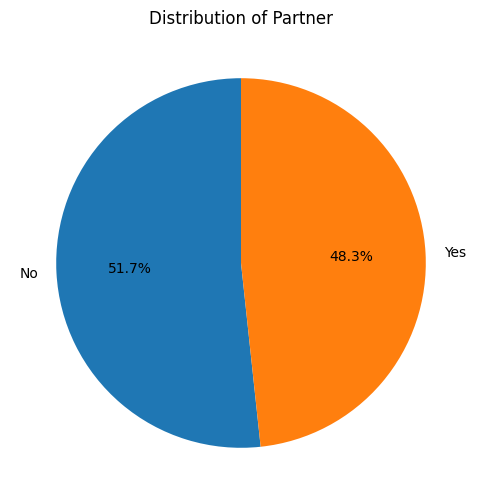

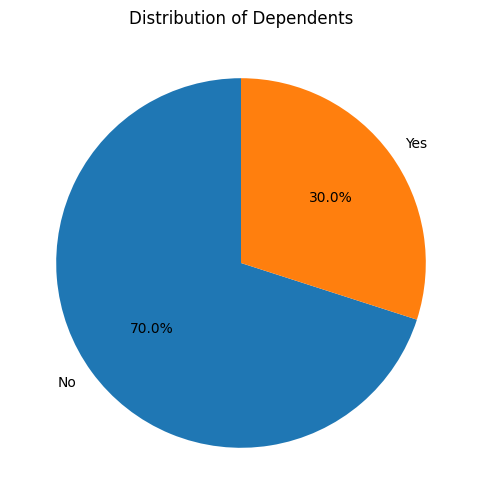

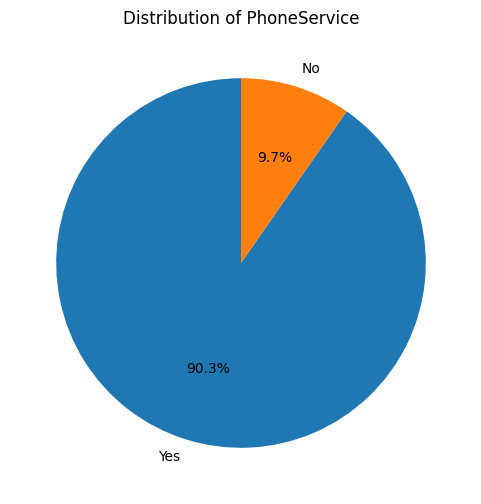

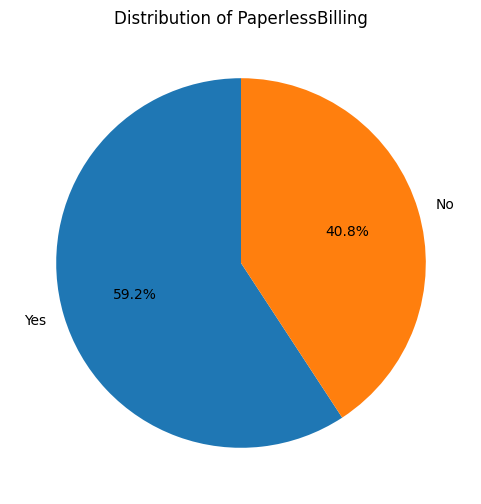

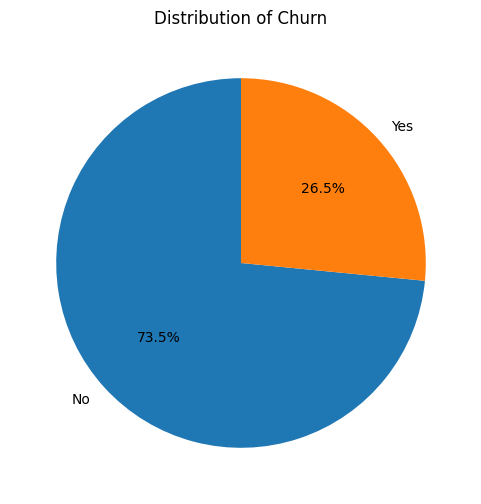

In [91]:
for col in df.columns:
    if df[col].nunique() == 2:
        value_counts = df[col].value_counts()

        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution of {col}')
        plt.show()

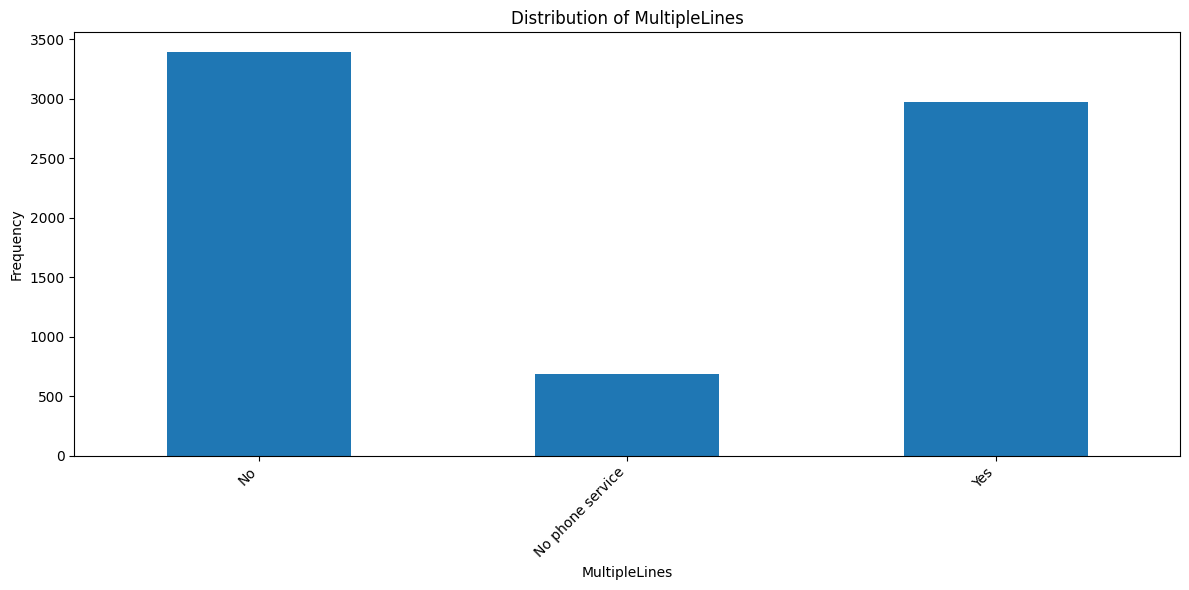

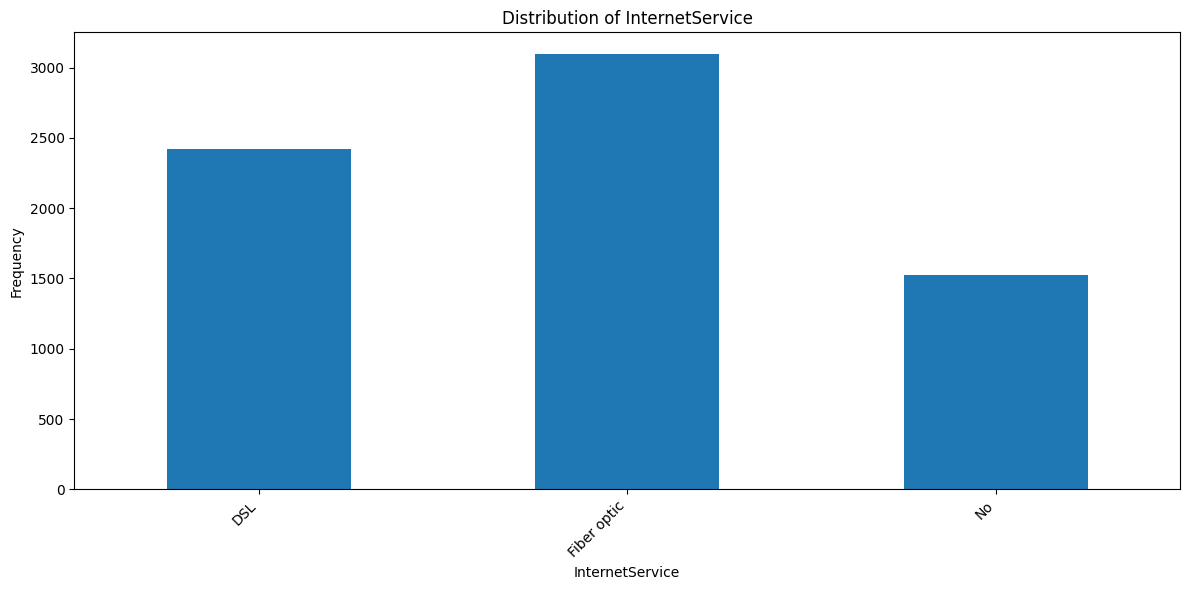

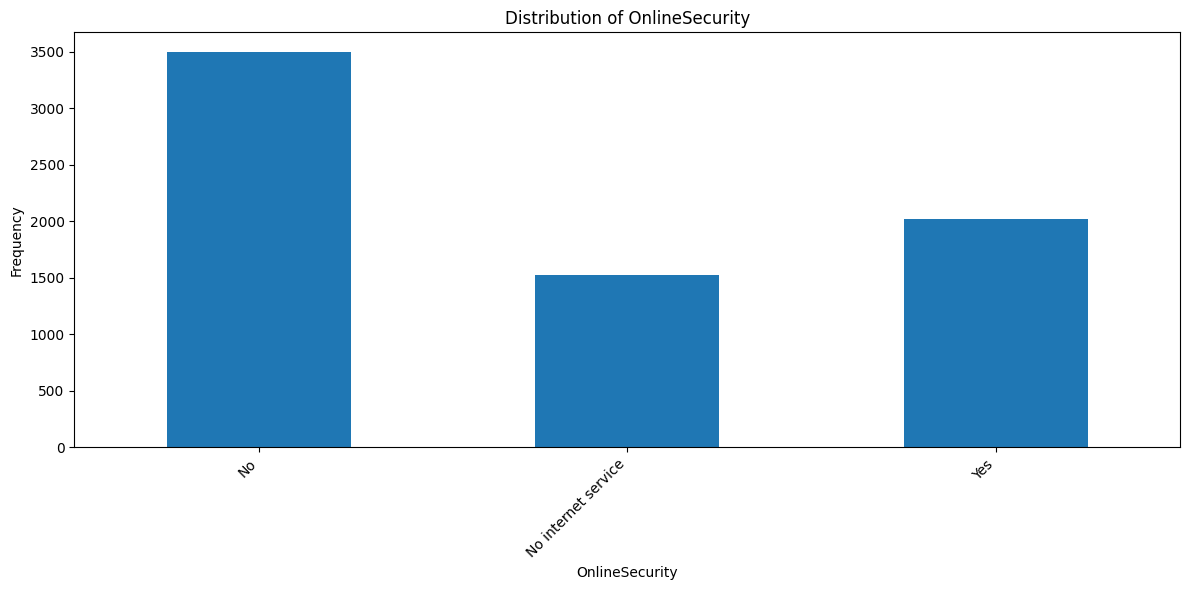

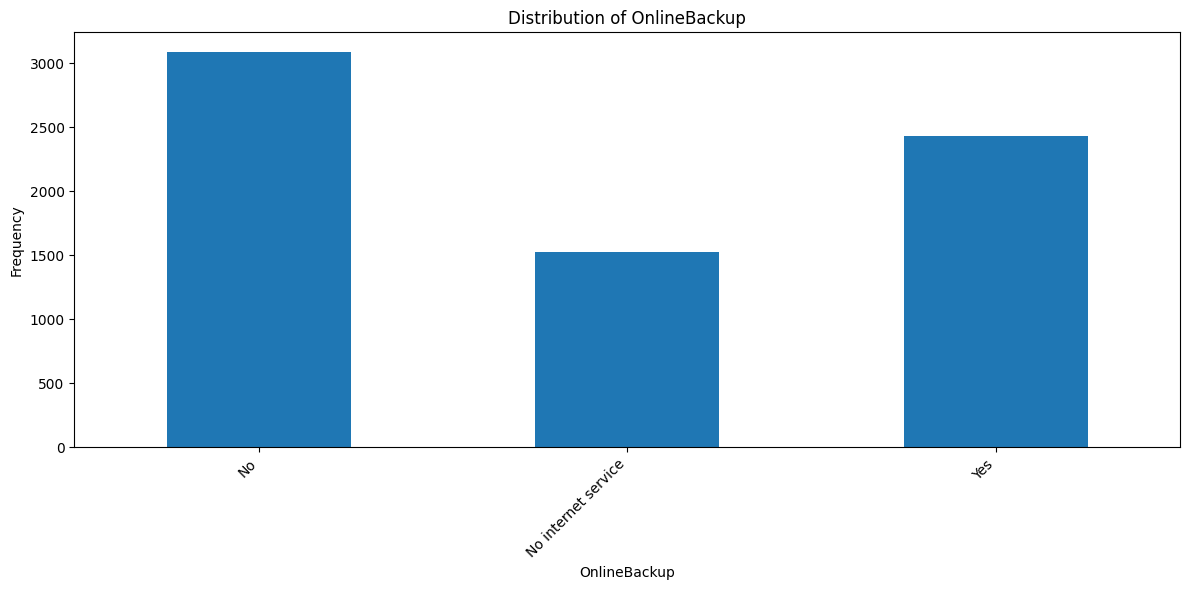

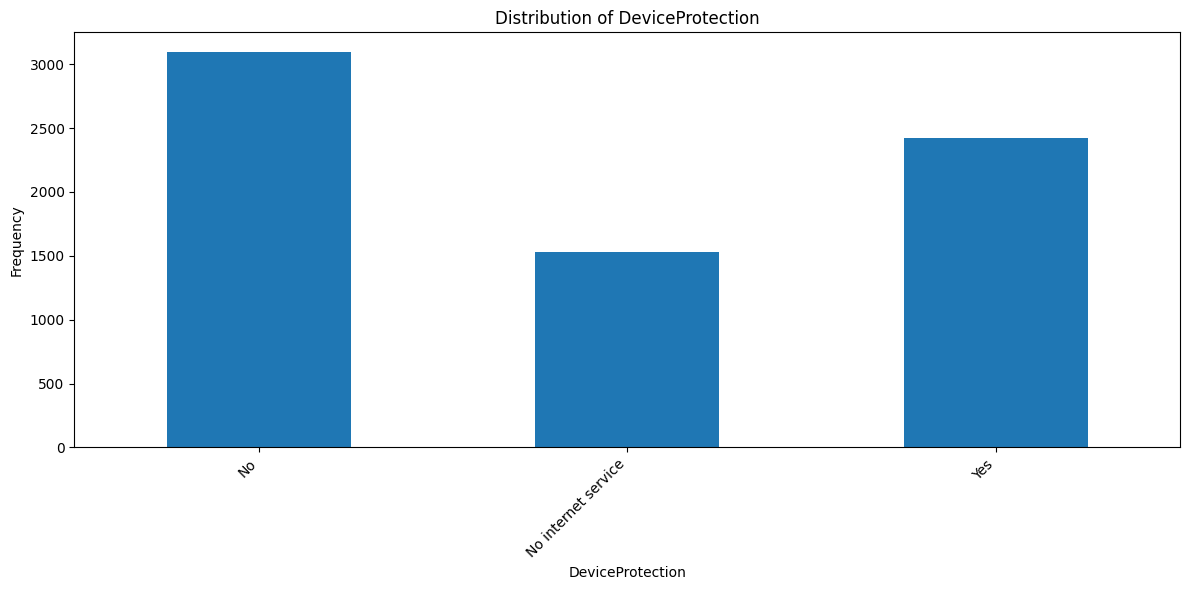

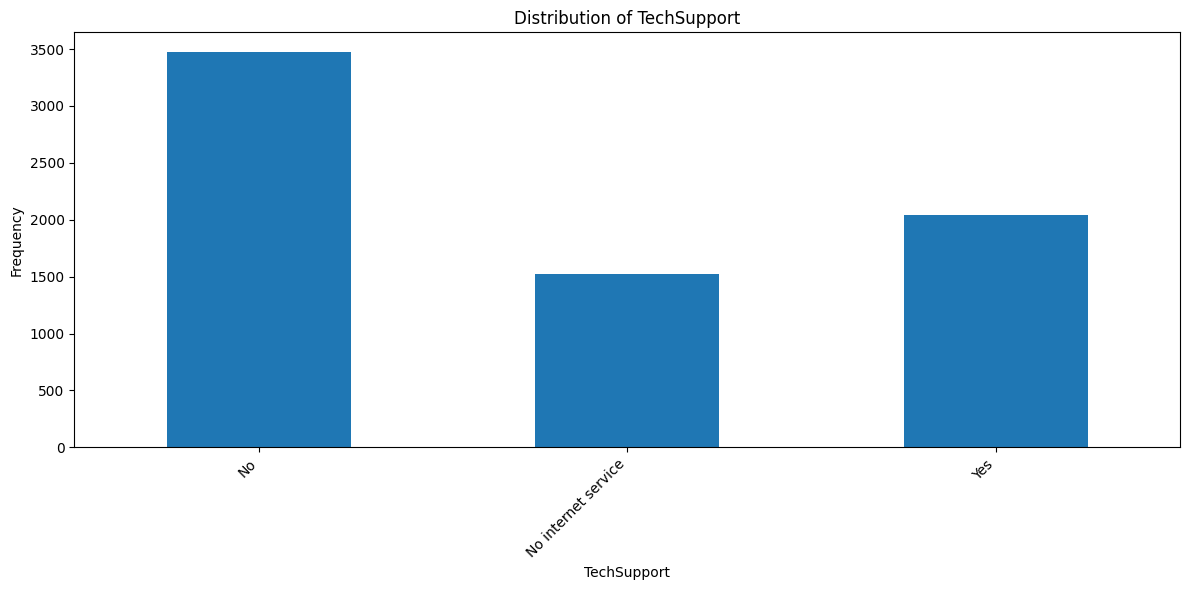

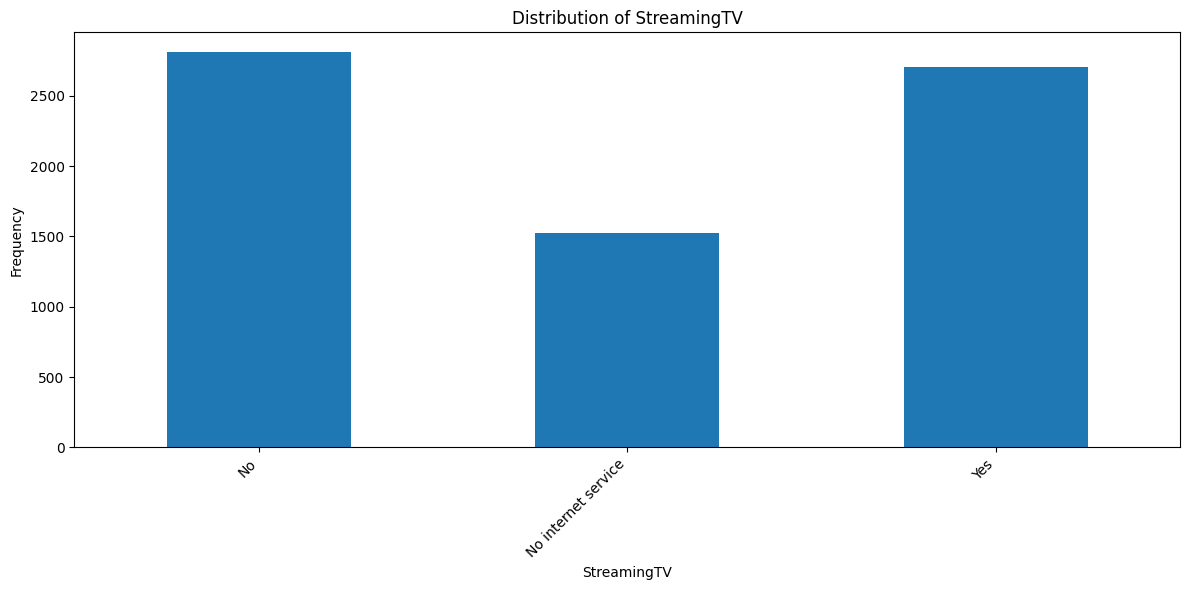

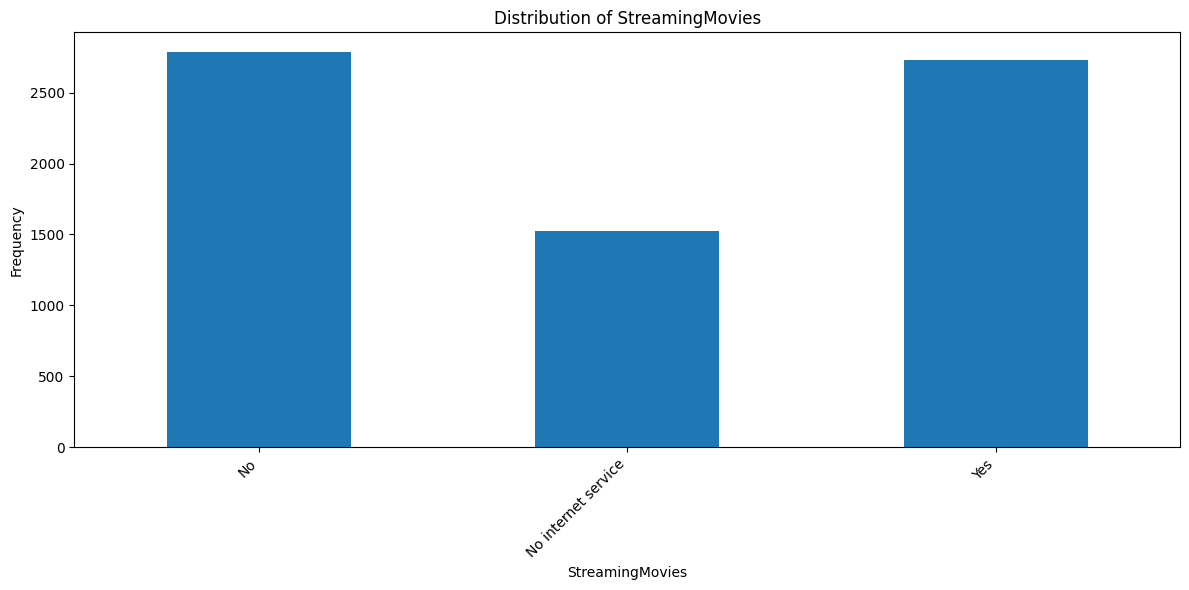

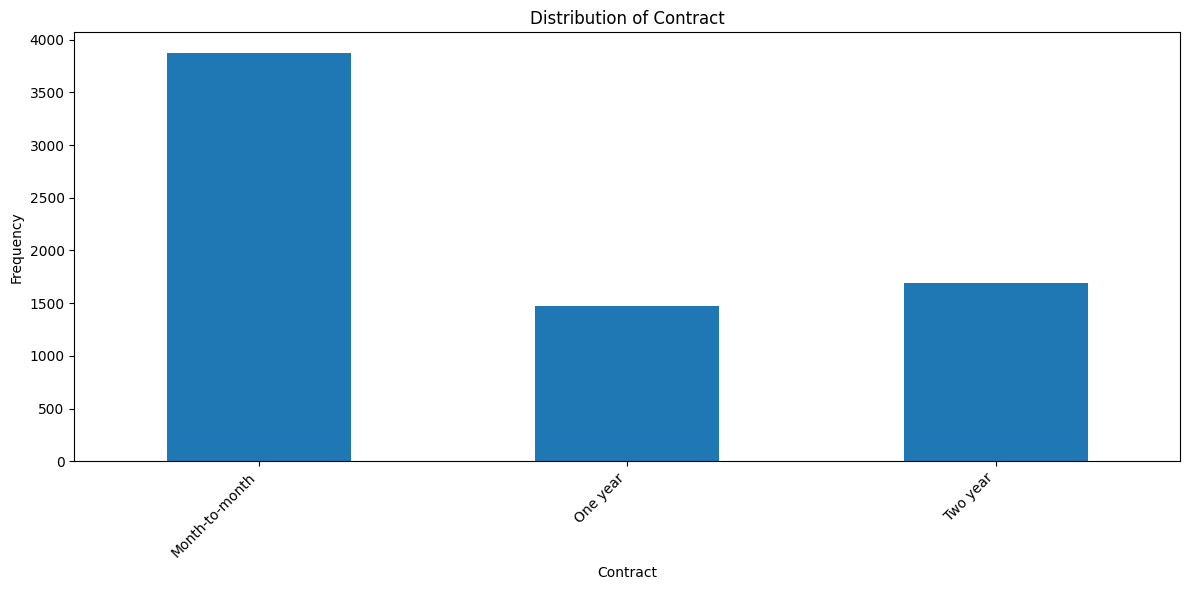

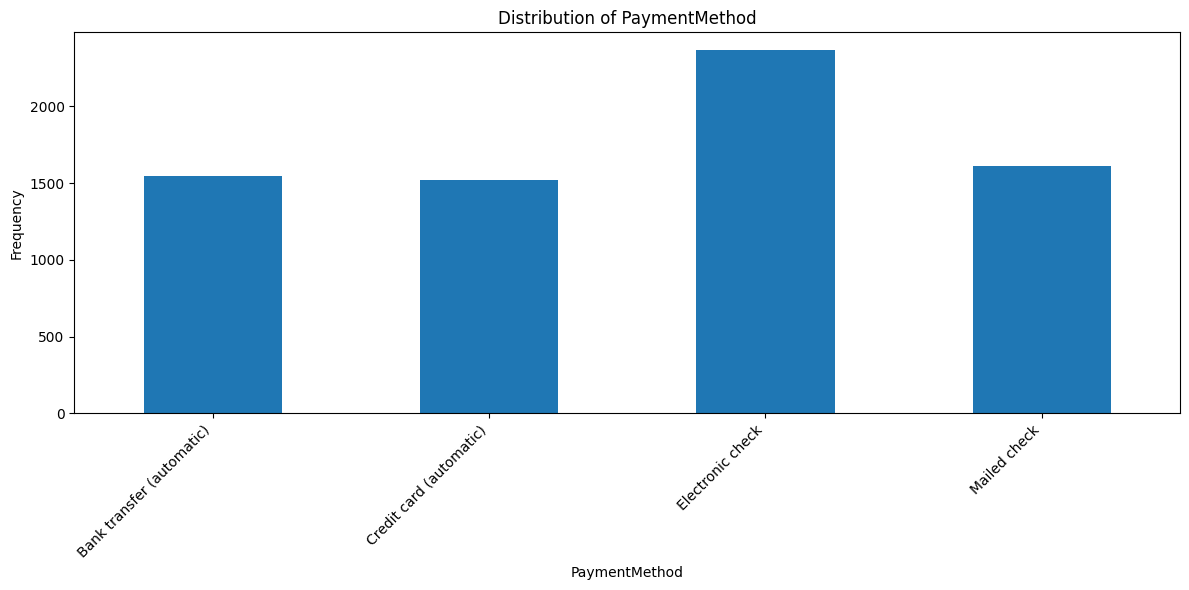

In [92]:
def create_barplot(data, col_name):
    plt.figure(figsize=(12, 6))
    sorted_counts = data.value_counts().sort_index()
    sorted_counts.plot(kind='bar')
    plt.xlabel(f'{col_name}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

cols = df.select_dtypes(include=object).columns

for col in cols:
    if len(df[col].unique()) > 2:
        if len(df[col].unique()) < 5:
            create_barplot(df[col], col)

## Cleaning

In [93]:
df.drop(columns='customerID', inplace=True)

### Null Value

In [94]:
df.isnull().sum()

gender              5
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
df.dropna(inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Duplicate

In [96]:
df.duplicated().sum()

np.int64(22)

In [97]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [98]:
df['gender'] = df['gender'].replace({'F': 'Female', 'M': 'Male'})

df['gender'].nunique()

2

In [99]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7014.000000,7014.000000,7014.000000
mean,0.162532,35.159538,64.837290
std,0.368965,115.479413,30.060728
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.712500
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.887500
max,1.000000,7100.000000,118.750000


## Transform

In [100]:
df['tenure'] = df['tenure'].astype(int)

df['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [101]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})

C:\Users\USER\AppData\Local\Temp\ipykernel_25188\3410664000.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})


In [102]:
df[yes_no_columns].head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [103]:
from sklearn.preprocessing import LabelEncoder
df_num = df.copy()
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df_num[col] = le.fit_transform(df[col])

df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7014 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7014 non-null   int64  
 1   SeniorCitizen     7014 non-null   int64  
 2   Partner           7014 non-null   int64  
 3   Dependents        7014 non-null   int64  
 4   tenure            7014 non-null   int64  
 5   PhoneService      7014 non-null   int64  
 6   MultipleLines     7014 non-null   int64  
 7   InternetService   7014 non-null   int64  
 8   OnlineSecurity    7014 non-null   int64  
 9   OnlineBackup      7014 non-null   int64  
 10  DeviceProtection  7014 non-null   int64  
 11  TechSupport       7014 non-null   int64  
 12  StreamingTV       7014 non-null   int64  
 13  StreamingMovies   7014 non-null   int64  
 14  Contract          7014 non-null   int64  
 15  PaperlessBilling  7014 non-null   int64  
 16  PaymentMethod     7014 non-null   int64  
 17  

## Outlier handling

Outliers found in columns:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 8 to 300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tenure  5 non-null      int64
dtypes: int64(1)
memory usage: 80.0 bytes
None


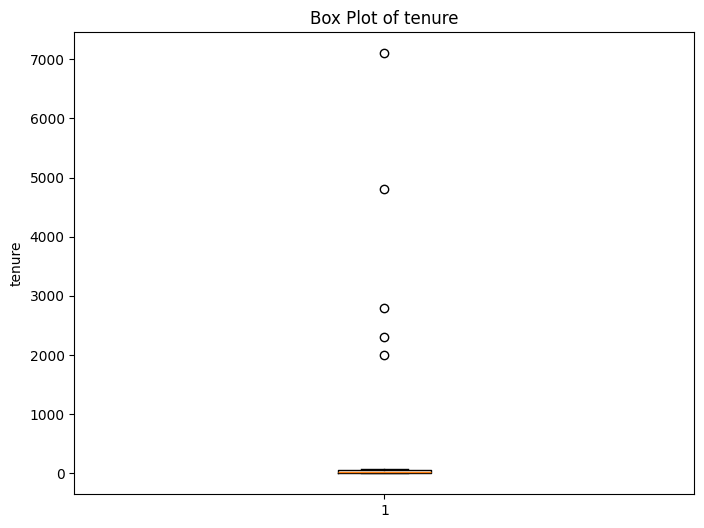

In [104]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers_df = pd.DataFrame()

for col in df_num:
    if len(df_num[col].unique()) > 2:
        outliers = find_outliers_iqr(df_num[col])
        if not outliers.empty:
            outliers_df = pd.concat([outliers_df, outliers.rename(col)], axis=1)

if not outliers_df.empty:
    print("Outliers found in columns:")
    print(outliers_df.info())
else:
    print("No outliers found")

range_counts = {}
for col in outliers_df:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_num[col])
    plt.ylabel(f'{col}')
    plt.title(f'Box Plot of {col}')
    plt.show()

In [105]:
df_no_Outlier = df_num.copy()

def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

for col in outliers_df:
    df_no_Outlier[col] = remove_outliers(df_no_Outlier[col])

df_no_Outlier.dropna(inplace=True)

No outliers found


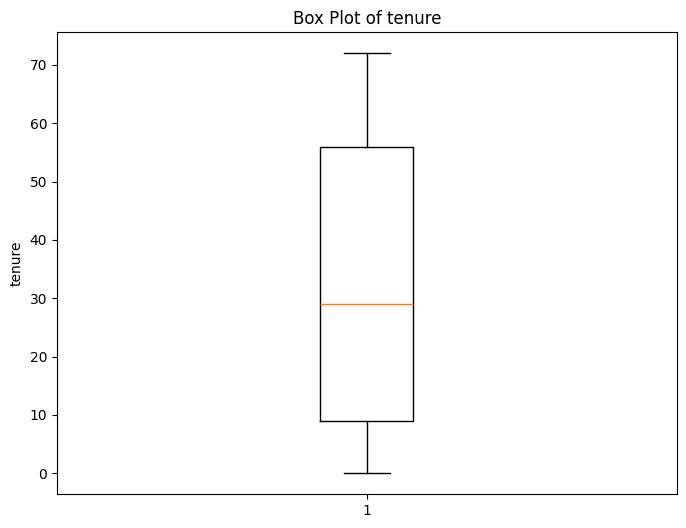

In [106]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

numeric_cols = df_no_Outlier.select_dtypes(include=np.number).columns
outliers_df_2 = pd.DataFrame()

for col in numeric_cols:
    if len(df_no_Outlier[col].unique()) > 2:
        outliers = find_outliers_iqr(df_no_Outlier[col])
        if not outliers.empty:
            outliers_df_2 = pd.concat([outliers_df_2, outliers.rename(col)], axis=1)

if not outliers_df_2.empty:
    print("Outliers found in columns:")
    print(outliers_df_2.info())
else:
    print("No outliers found")


range_counts = {}
for col in outliers_df:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_no_Outlier[col])
    plt.ylabel(f'{col}')
    plt.title(f'Box Plot of {col}')
    plt.show()

In [107]:
df_num = df_no_Outlier

# Correlation analysis

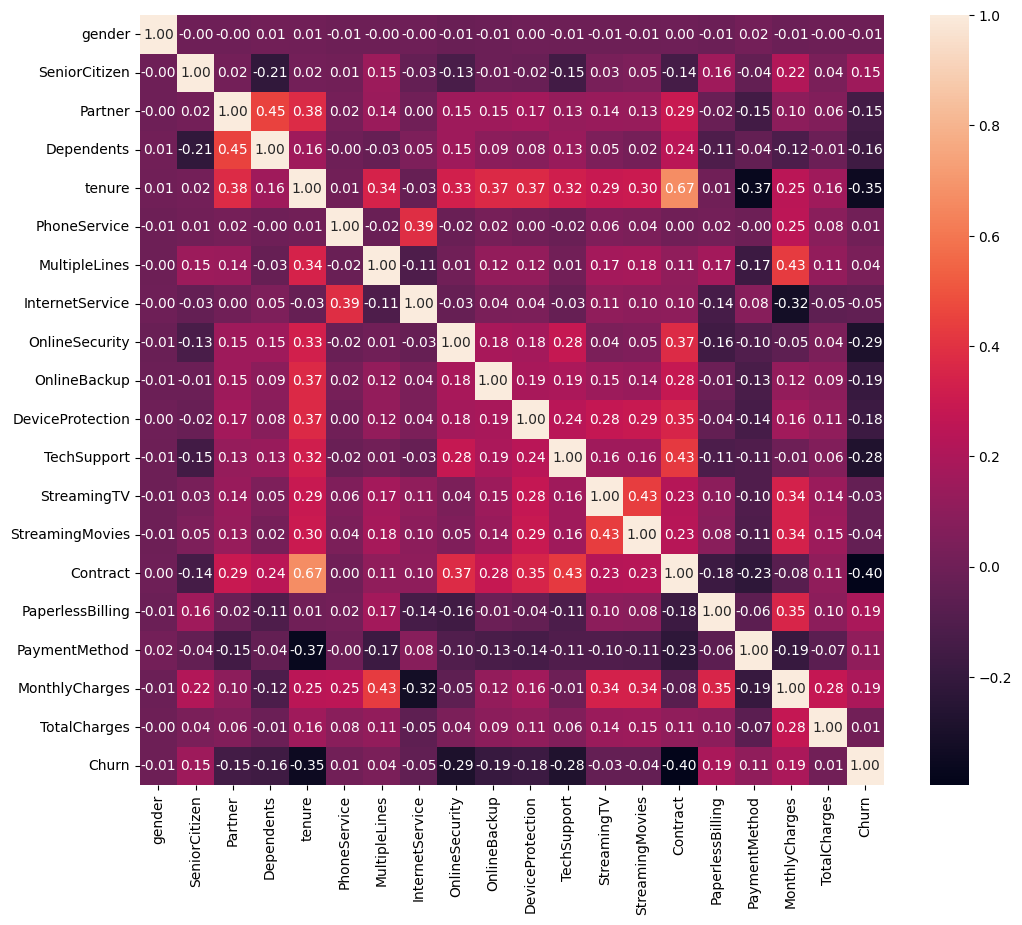

In [108]:
correlation = df_num.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True,fmt='.2f')
plt.show()

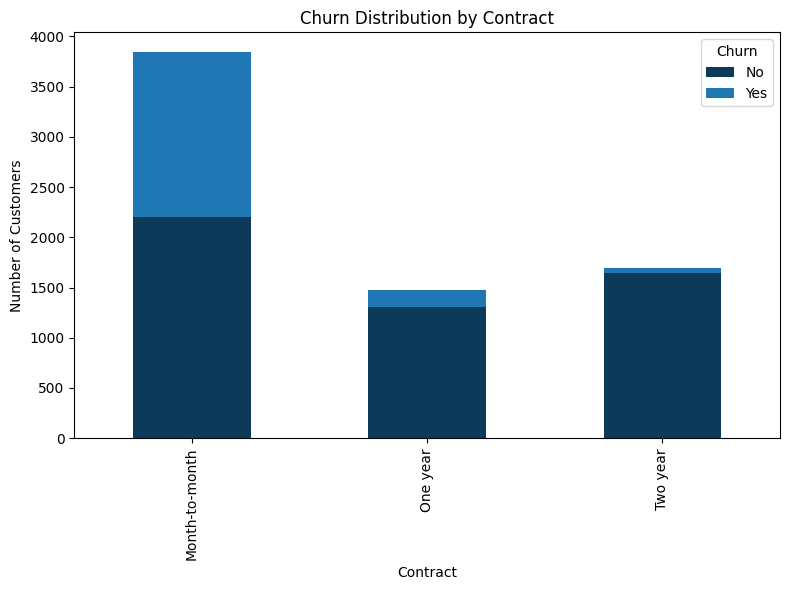

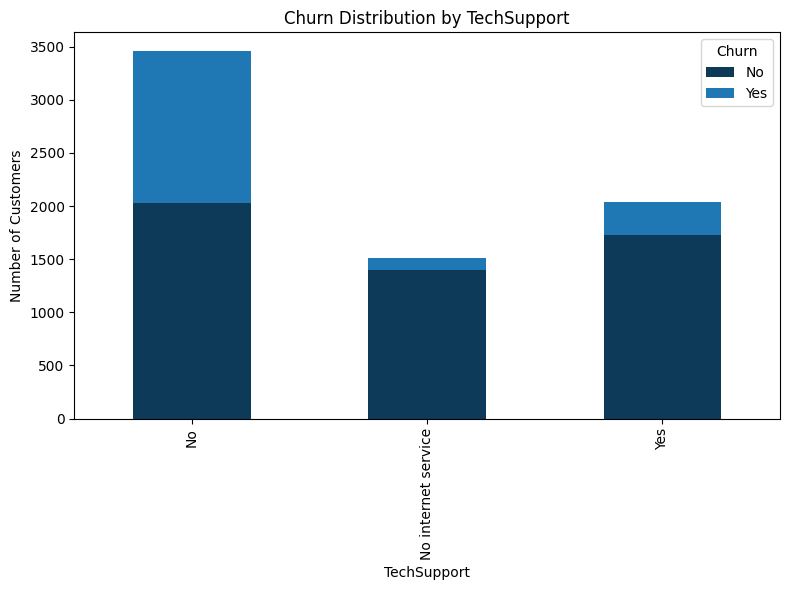

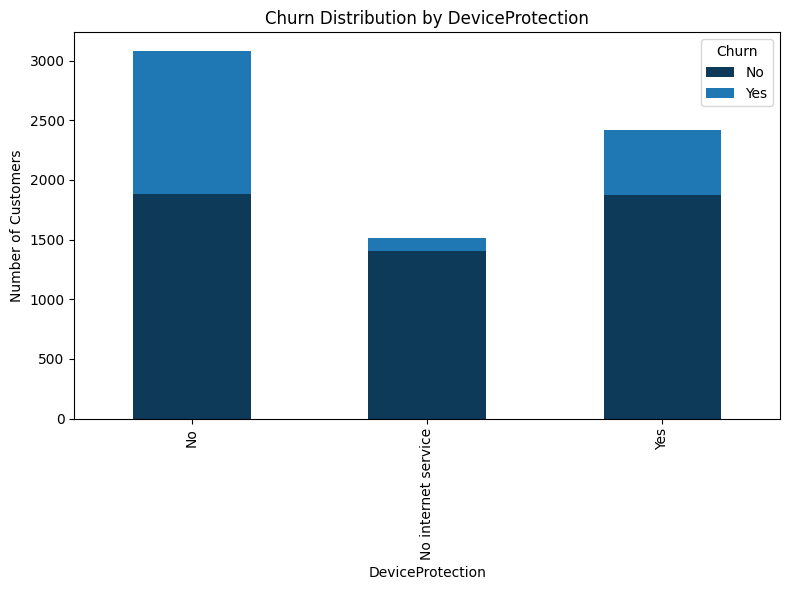

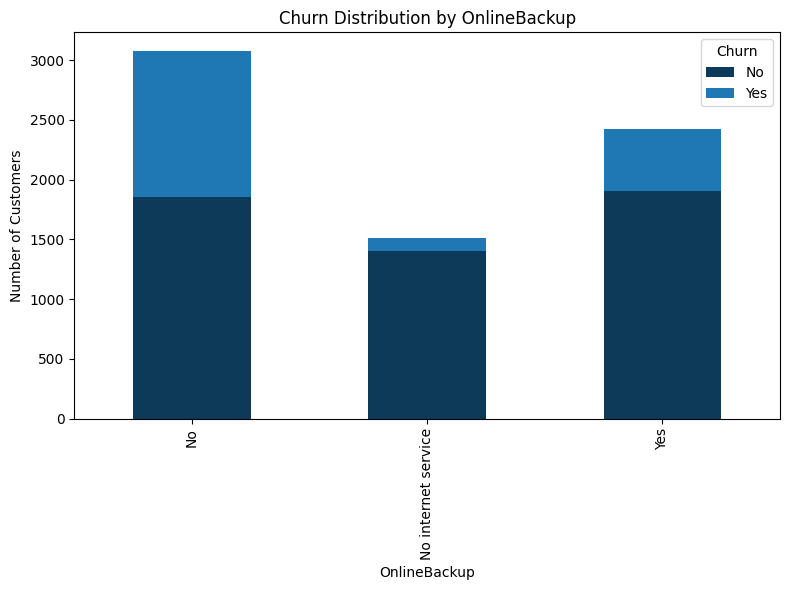

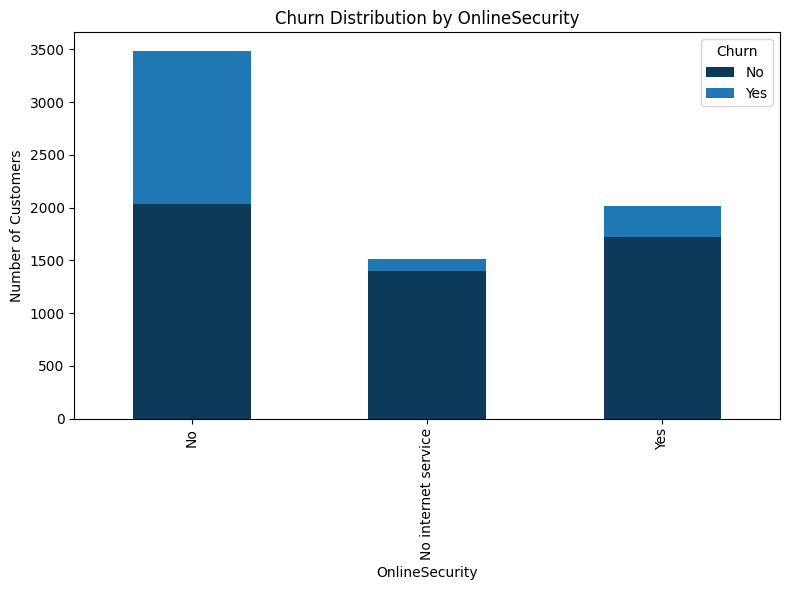

In [109]:
features = ['Contract', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']

for feature in features:
    churn_counts = df.groupby([feature, 'Churn']).size().unstack(fill_value=0)\
    
    ax = churn_counts.plot(
        kind='bar', 
        stacked=True, 
        color=['#0d3a59', '#1f77b4'], 
        figsize=(8, 6),
    )
    
    ax.set_title(f'Churn Distribution by {feature}')
    ax.set_ylabel("Number of Customers")
    ax.set_xlabel(feature)
    ax.legend(title='Churn', labels=['No', 'Yes'])
    
    plt.tight_layout()
    plt.show()

# Regression and Classification

### Feature Selection

In [110]:
categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract','PaymentMethod']
df_one_hot = pd.get_dummies(df_num, columns=categorical_columns, drop_first=True)

In [111]:
from sklearn.model_selection import train_test_split

X = df_num.drop(['Churn'], axis=1)
y = df_num['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
display(X_test.info())
display(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2103 entries, 5156 to 2962
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2103 non-null   int64  
 1   SeniorCitizen     2103 non-null   int64  
 2   Partner           2103 non-null   int64  
 3   Dependents        2103 non-null   int64  
 4   tenure            2103 non-null   float64
 5   PhoneService      2103 non-null   int64  
 6   MultipleLines     2103 non-null   int64  
 7   InternetService   2103 non-null   int64  
 8   OnlineSecurity    2103 non-null   int64  
 9   OnlineBackup      2103 non-null   int64  
 10  DeviceProtection  2103 non-null   int64  
 11  TechSupport       2103 non-null   int64  
 12  StreamingTV       2103 non-null   int64  
 13  StreamingMovies   2103 non-null   int64  
 14  Contract          2103 non-null   int64  
 15  PaperlessBilling  2103 non-null   int64  
 16  PaymentMethod     2103 non-null   int64  
 1

None

<class 'pandas.core.series.Series'>
Index: 2103 entries, 5156 to 2962
Series name: Churn
Non-Null Count  Dtype
--------------  -----
2103 non-null   int64
dtypes: int64(1)
memory usage: 32.9 KB


None

## Decission Tree

Decision Tree Model Accuracy: 0.7318116975748931

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1526
           1       0.51      0.51      0.51       577

    accuracy                           0.73      2103
   macro avg       0.66      0.66      0.66      2103
weighted avg       0.73      0.73      0.73      2103



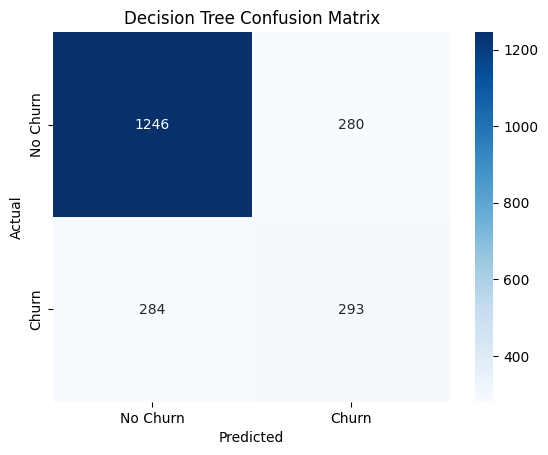

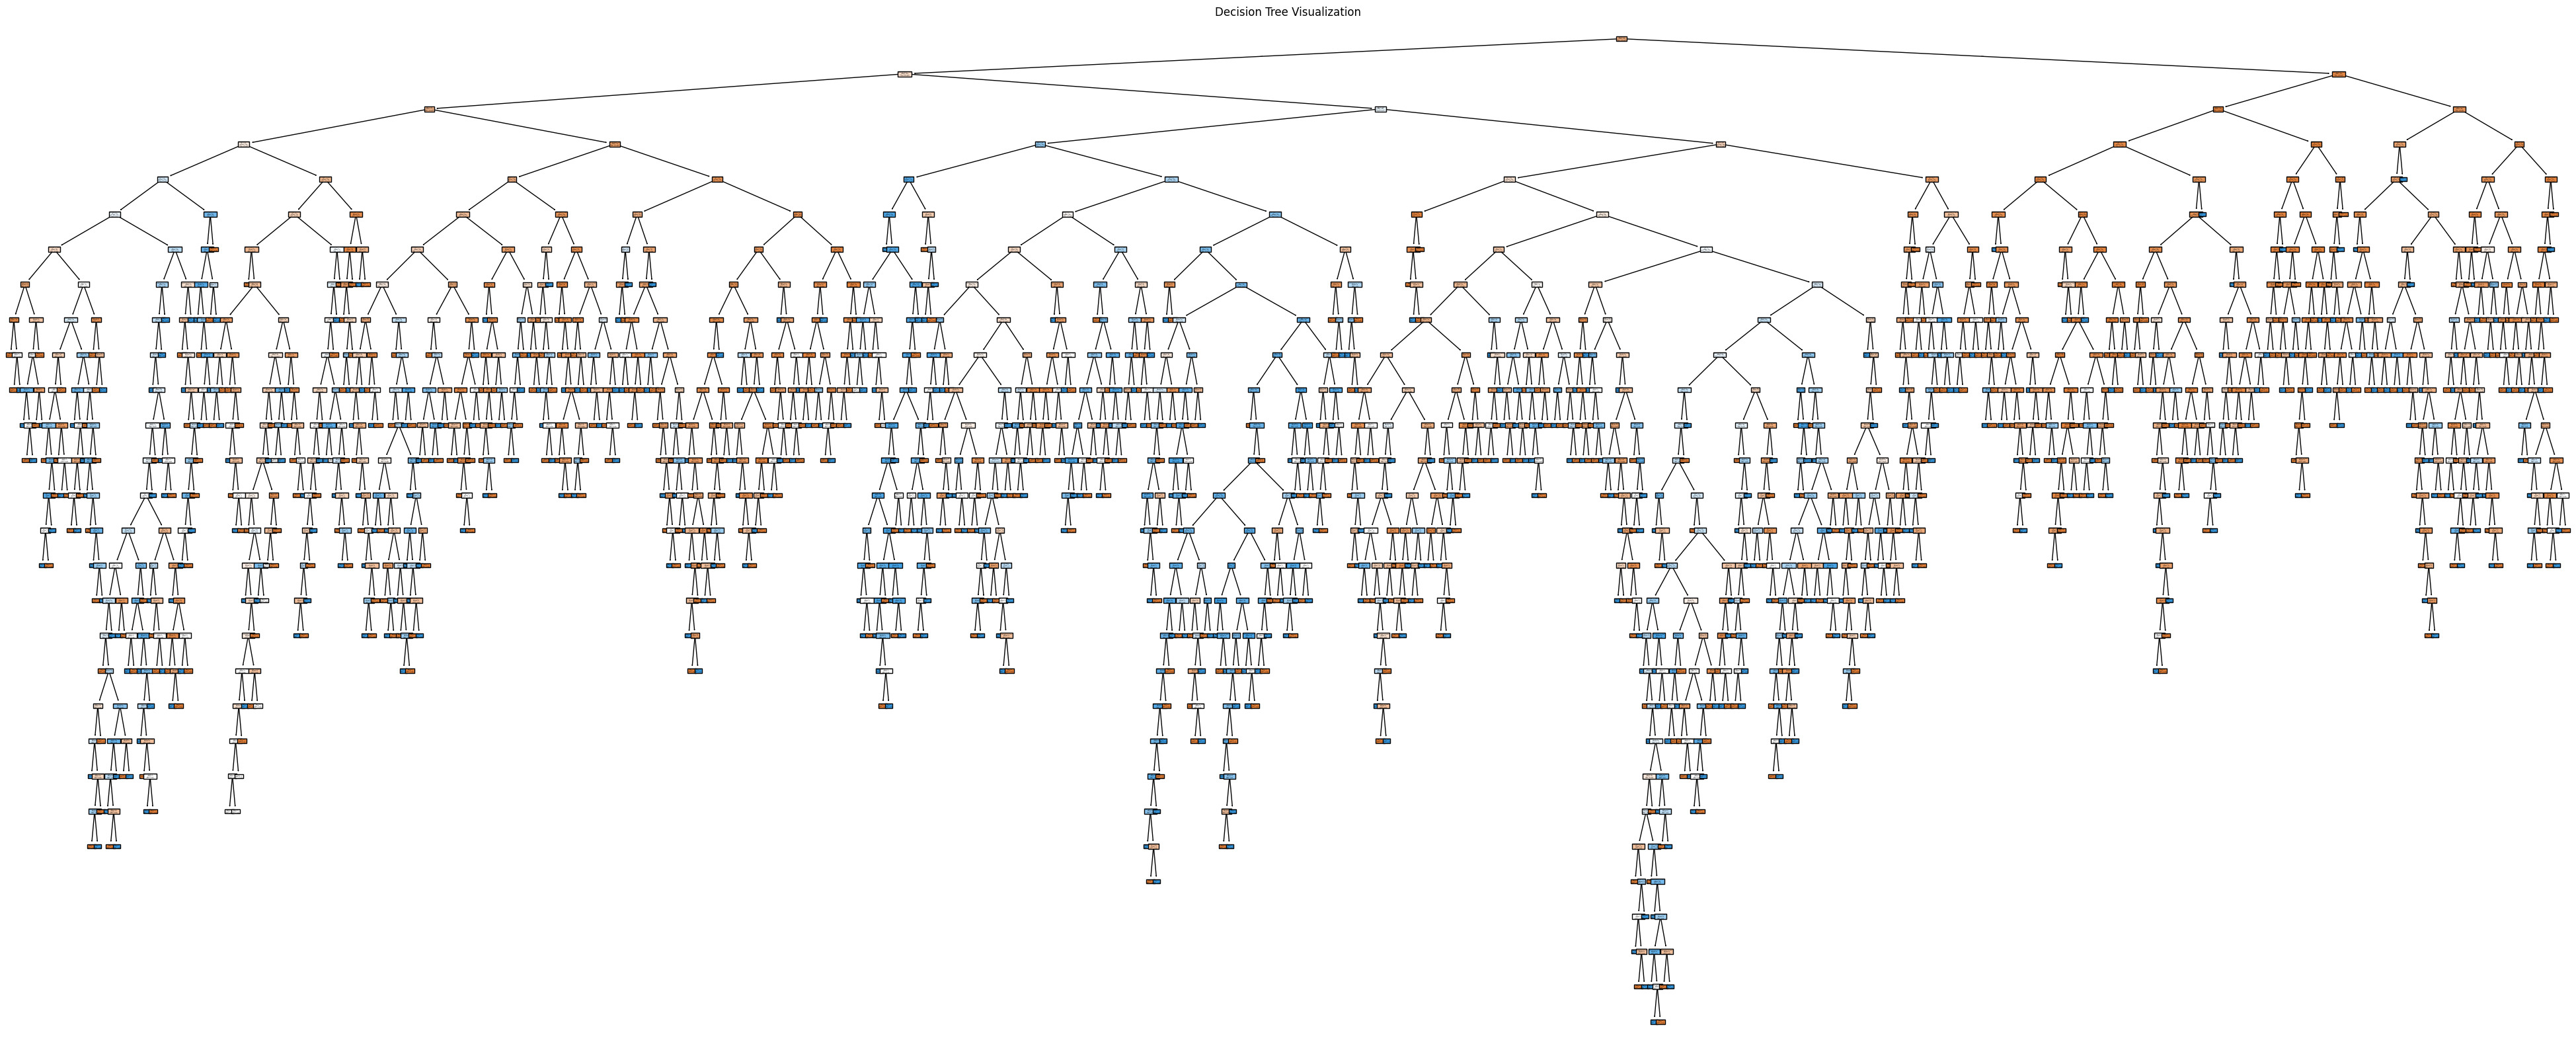

In [113]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree)

sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(50, 20))
tree.plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['No Churn', 'Churn'])
plt.title("Decision Tree Visualization")
plt.show()

             Feature  Importance
17    MonthlyCharges    0.229479
18      TotalCharges    0.193270
14          Contract    0.170149
4             tenure    0.145564
16     PaymentMethod    0.047802
0             gender    0.032946
15  PaperlessBilling    0.020564
9       OnlineBackup    0.020264
3         Dependents    0.020023
8     OnlineSecurity    0.016565
1      SeniorCitizen    0.015468
7    InternetService    0.014845
2            Partner    0.014023
11       TechSupport    0.013893
10  DeviceProtection    0.013383
6      MultipleLines    0.009672
12       StreamingTV    0.008581
13   StreamingMovies    0.008448
5       PhoneService    0.005060


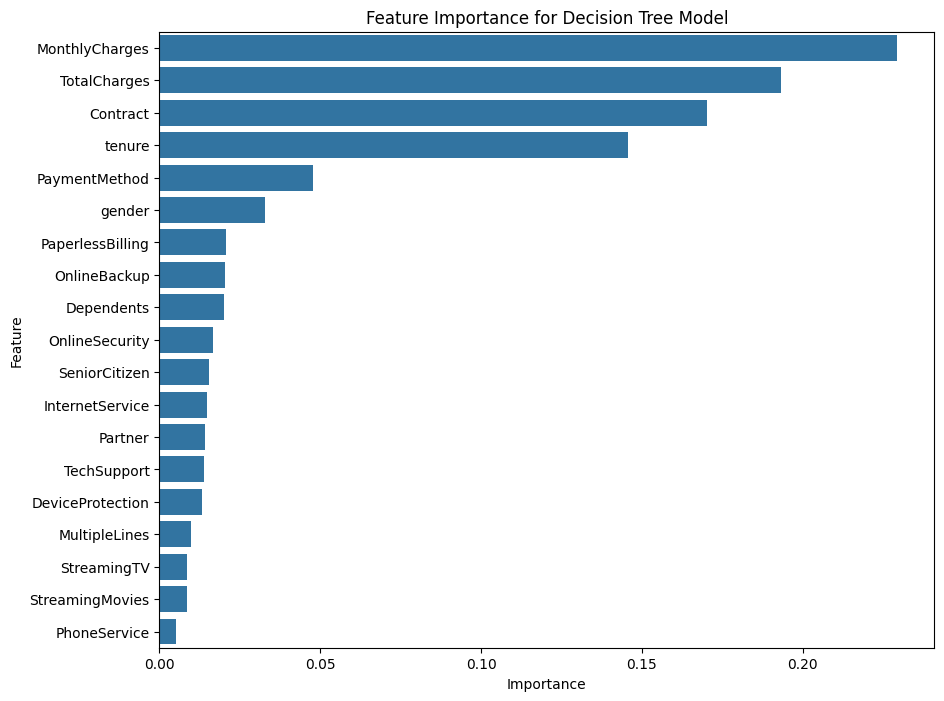

In [114]:
importances = tree_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Visualize
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Logistic

Logistic Regression Model Accuracy: 0.7831669044222539

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1526
           1       0.62      0.53      0.57       577

    accuracy                           0.78      2103
   macro avg       0.73      0.71      0.71      2103
weighted avg       0.77      0.78      0.78      2103



c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


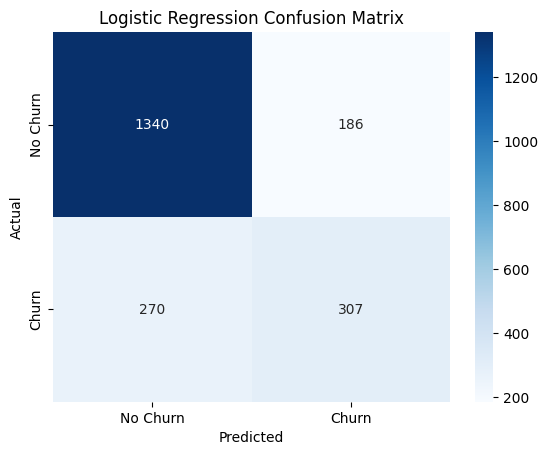

In [115]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)

sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

             Feature  Importance
11       TechSupport    0.412070
14          Contract    0.407135
8     OnlineSecurity    0.404021
5       PhoneService    0.248481
3         Dependents    0.204135
9       OnlineBackup    0.201453
1      SeniorCitizen    0.164436
15  PaperlessBilling    0.157813
6      MultipleLines    0.157584
13   StreamingMovies    0.110075
0             gender    0.105196
10  DeviceProtection    0.095809
2            Partner    0.065995
12       StreamingTV    0.045363
4             tenure    0.037430
7    InternetService    0.036166
16     PaymentMethod    0.024293
17    MonthlyCharges    0.017122
18      TotalCharges    0.000001


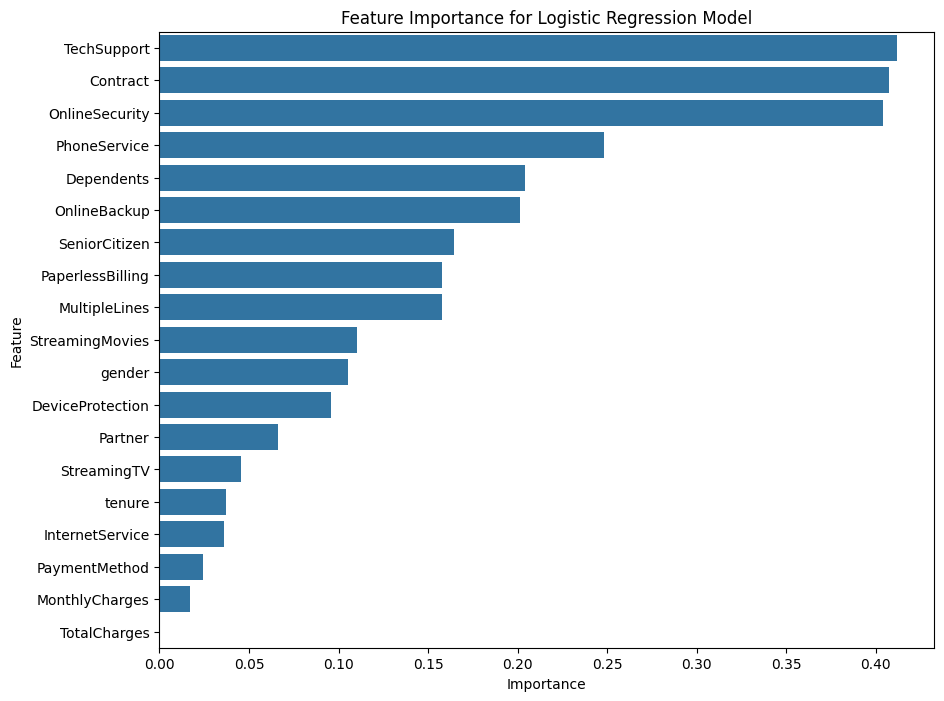

In [116]:
importances = logreg_model.coef_[0]

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(importances)
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Linear

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Feature Selection

In [118]:
X = df_num.drop(['MonthlyCharges'], axis=1)
y = df_num['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regression

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 306.86
Mean Absolute Error (MAE): 14.77
R-squared: 0.66


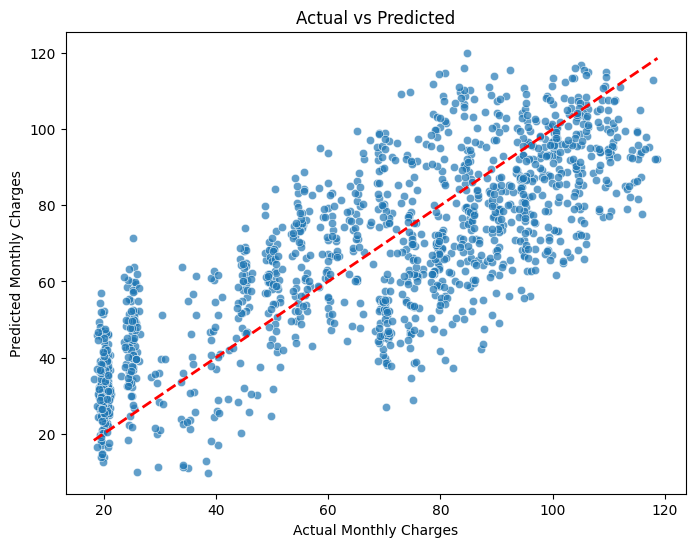

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Monthly Charges")
plt.ylabel("Predicted Monthly Charges")
plt.show()

In [121]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'])

df[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']].astype(float)

C:\Users\USER\AppData\Local\Temp\ipykernel_25188\1216521553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']].astype(float)


In [123]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

columns_to_clean = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_clean = remove_outliers_iqr(df, columns_to_clean)

df_num = df_clean[columns_to_clean]

print(f"Data setelah pembersihan outlier: {df_num.shape}")

Data setelah pembersihan outlier: (6998, 3)


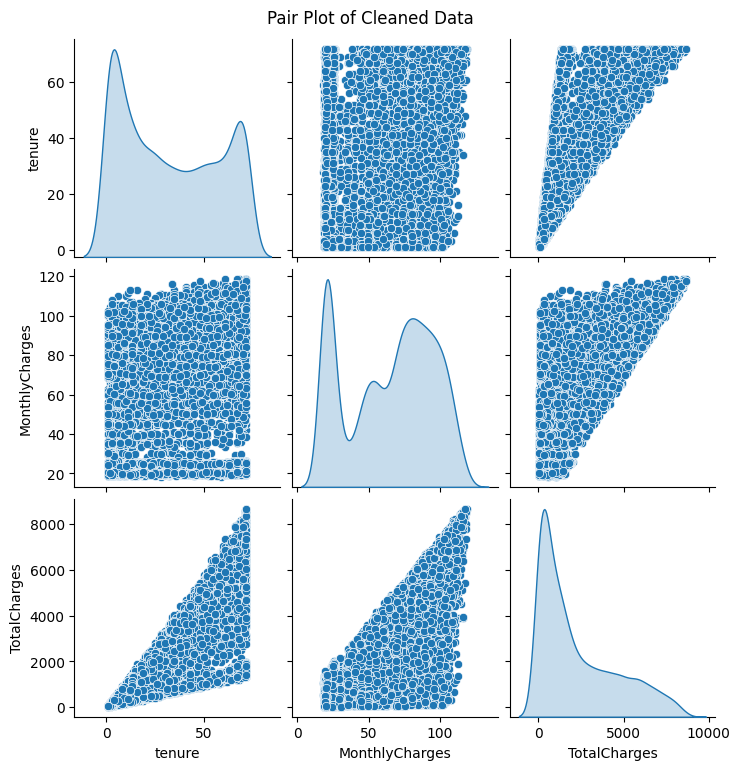

In [124]:
sns.pairplot(df_num, diag_kind='kde')
plt.suptitle('Pair Plot of Cleaned Data', y=1.02)
plt.show()

In [125]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

In [126]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")

Explained Variance Ratio by PCA: [0.72603592 0.2542763 ]


In [127]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

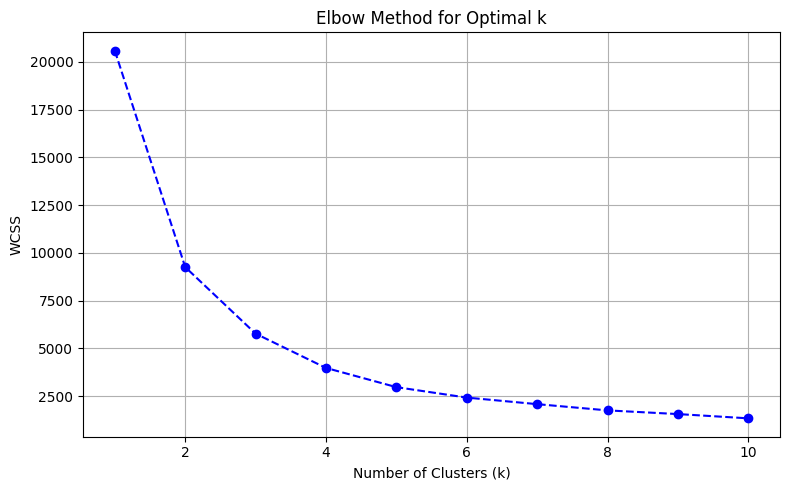

In [ ]:
# Plot Elbow Method dan simpan gambar
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
# plt.savefig('elbow_method.png', dpi=300)  # Simpan file gambar
plt.show()

Silhouette Score for KMeans: 0.46


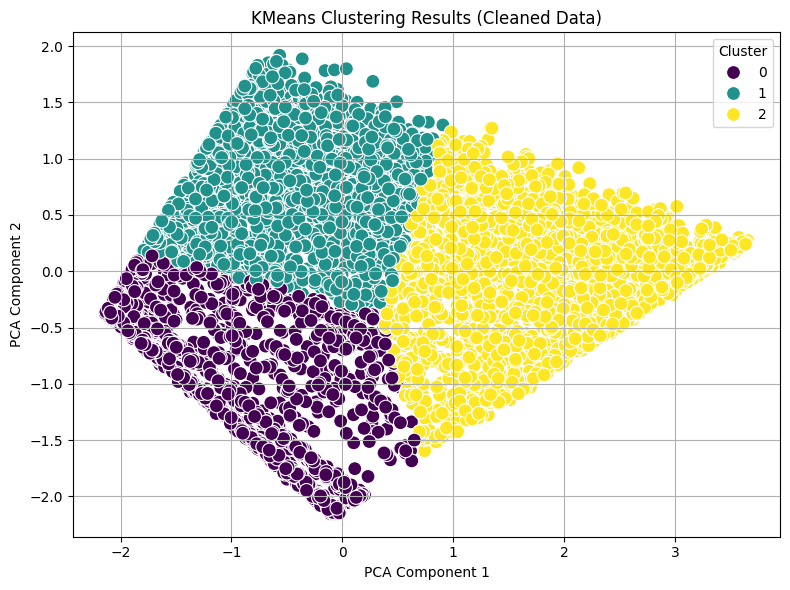

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# KMeans Clustering
k_optimal = 3  # Tentukan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_clusters = kmeans.fit_predict(pca_data)

# Evaluasi Silhouette Score
silhouette_kmeans = silhouette_score(pca_data, kmeans_clusters)
print(f"Silhouette Score for KMeans: {silhouette_kmeans:.2f}")

# Simpan hasil plot ke file
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_clusters, palette='viridis', s=100)
plt.title('KMeans Clustering Results (Cleaned Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
# plt.savefig('kmeans_clustering_results.png', dpi=300)  # Simpan file gambar
plt.show()
